# Fashion Data Generator

We want the MIL datasets to be identical from run to run. To do this, we'll produce CSVs with bag indices and labels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import sklearn
from tensorflow.keras.datasets import fashion_mnist

# Set random seeds for consistency
random.seed(42)
np.random.seed(42)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


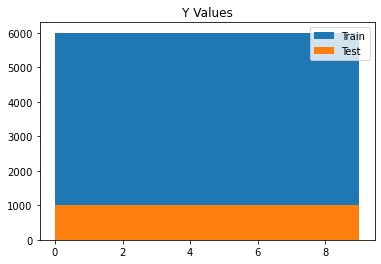

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

plt.hist(y_train)
plt.hist(y_test)
plt.legend(['Train', 'Test'])
plt.title('Y Values')
plt.show()
plt.close()

In [3]:
def pad(arr, max_size):
  p = np.empty(max_size - arr.shape[0])
  p.fill(-1)
  return np.concatenate([arr, p])

def bag_generator(x, y, get_label, min_size=3, max_size=7):
  x_shuf, y_shuf = sklearn.utils.shuffle(np.arange(x.shape[0]), y)

  x_bags = []
  y_bags = []
  
  i = 0
  
  while (x_shuf.shape[0] - i) > max_size:
    size = random.randrange(min_size, min(max_size, x_shuf.shape[0] - i - min_size))
    x_bags.append(pad(x_shuf[i:i + size], max_size))
    y_bags.append(get_label(y_shuf[i:i + size]))
    i += size

  x_bags.append(pad(x_shuf[i:], max_size))
  y_bags.append(get_label(y_shuf[i:]))

  return np.array(x_bags).astype(int), np.array(y_bags).astype(int)

def contains_handbag(labels):
  return np.any(np.array(labels) == 8).astype(int)


x_train_bags, y_train_bags = bag_generator(x_train, y_train, contains_handbag)
x_test_bags, y_test_bags = bag_generator(x_test, y_test, contains_handbag)


print(f'train: x={x_train_bags.shape}, y={y_train_bags.shape}, %={y_train_bags.sum() / y_train_bags.shape[0]}')
print(f'test : x={x_test_bags.shape}, y={y_test_bags.shape}, %={y_test_bags.sum() / y_test_bags.shape[0]}')

train: x=(13294, 7), y=(13294,), %=0.37460508500075224
test : x=(2233, 7), y=(2233,), %=0.3730407523510972


In [4]:
train = np.concatenate([y_train_bags[:, np.newaxis], x_train_bags], axis=1)
test = np.concatenate([y_test_bags[:, np.newaxis], x_test_bags], axis=1)

columns = ['y'] + [ f'x{i}' for i in range(train.shape[1] - 1)]

train_df = pd.DataFrame(train, columns=columns)
test_df = pd.DataFrame(test, columns=columns)

train_df.to_csv('data/fashion_train.csv')
test_df.to_csv('data/fashion_test.csv')